<h1 align="center"><strong>Streaming Viewing Analysis</strong></h1>

<h2><strong>1. Read the Data In</strong></h2>

This is where I import any needed Python libraries and all datasets I'll use in this notebook.

In [56]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

*<h3><strong>Note about the datasets:</strong></h3>*
*Since I used four different datasets, I decided to clean each dataset in their own Jupyter Notebook and store each dataframe as a variable to use in this notebook.*

*<strong>Individual Dataset Notebooks</strong>*
   > [Hulu](hulu.ipynb)
   > [Imdb](imdb.ipynb)
   > [Netflix](netflix.ipynb)
   > [Prime Video](prime_video.ipynb)

In [57]:
# Add stored dataframes from other notebooks
%store -r hulu_cleaned
%store -r netflix_cleaned
%store -r prime_video_cleaned
%store -r imdb_cleaned

In [58]:
# Combine Hulu, Netflix, and Prime_Video dataframes
streaming_list = [hulu_cleaned, netflix_cleaned, prime_video_cleaned]
streaming_combined = pd.concat(streaming_list)

# View the first five rows of the new combined dataframe
streaming_combined.head()

,Title,Date Watched,Streaming Service
0,Only Murders in the Building,10/30/2022 22:18,Hulu
1,Only Murders in the Building,10/30/2022 21:39,Hulu
2,Only Murders in the Building,10/30/2022 21:03,Hulu
3,Only Murders in the Building,10/30/2022 5:48,Hulu
4,Only Murders in the Building,10/30/2022 5:12,Hulu


In [59]:
# Get info about the streaming_combined dataframe
streaming_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27349 entries, 0 to 1869
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              27315 non-null  object
 1   Date Watched       27289 non-null  object
 2   Streaming Service  27349 non-null  object
dtypes: object(3)
memory usage: 854.7+ KB


<h2><strong>2. Manipulate and Visualize the Data</strong></h2>

`Q1. Which streaming service is the most watched?`

`Q2. Which day had the most watched streams?`

### Q1 Most watched streaming service
Netflix is by far my most watched streaming service.

In [102]:
top_streaming_service = streaming_combined["Streaming Service"].value_counts()

top_streaming_service

Netflix        25052
Prime Video     1870
Hulu             427
Name: Streaming Service, dtype: int64

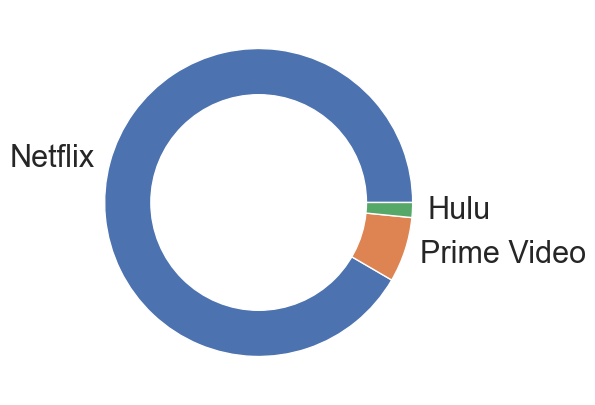

In [105]:
# Create a donut shaped Pie Chart
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
names = "Netflix", "Prime Video", "Hulu"
plt.pie(top_streaming_service, labels=names)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [61]:
# View most streamed titles in combined dataframe
most_streamed_titles = streaming_combined.Title.value_counts()

most_streamed_titles.head(10)

Them Idiots! Whirled Tour                                                     66
Home Improvement                                                              52
NullCompleteVideo                                                             44
Larry the Cable Guy: Tailgate Party                                           34
Top Gear: Series 22: Episode 5                                                32
Rodney Carrington: Laughter’s Good                                            30
Jeff Dunham: Relative Disaster                                                30
White Collar: Season 1: Pilot (Episode 1)                                     30
Sherlock: Series 1: A Study in Pink (Episode 1)                               30
Yu-Gi-Oh!: Season 1: Best of Friends Best of Duelists: Part 1 (Episode 33)    25
Name: Title, dtype: int64

In [62]:
# Merge streaming_combined dataframe with imdb_cleaned dataframe
data_combined = pd.merge(streaming_combined, imdb_cleaned, how="inner", on="Title")

# View the first five rows of the new merged dataframe
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score
0,Dark Shadows,10/19/2022 19:51,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2
1,Dark Shadows,10/27/2012 21:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
2,Dark Shadows,11/04/2012 3:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
3,Dark Shadows,11/04/2012 3:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2
4,Dark Shadows,11/04/2012 4:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2


In [63]:
# Get info about the merged dataframe
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              520 non-null    object 
 1   Date Watched       547 non-null    object 
 2   Streaming Service  554 non-null    object 
 3   Release Year       554 non-null    int64  
 4   Runtime            554 non-null    int64  
 5   Genres             554 non-null    object 
 6   Imdb Score         501 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 34.6+ KB


In [64]:
# Seeing if any NaN values are in the dataframe
data_combined[data_combined.isna().any(axis=1)].head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score
6,NaN,10/18/2022 23:03,Hulu,2015,11,[],NaN
7,NaN,11/17/2016 1:00:00,Prime Video,2015,11,[],NaN
8,NaN,12/31/2016 4:00:00,Prime Video,2015,11,[],NaN
9,NaN,12/31/2016 4:00:00,Prime Video,2015,11,[],NaN
10,NaN,03/30/2018 18:00:00,Prime Video,2015,11,[],NaN


In [96]:
# Remove any entries that have NaN as the "Title"
data_combined = data_combined[data_combined["Title"].str.contains('NaN') == False]

data_combined.head()

,Date Watched,Title,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre,Decade,Day Watched,Hour Watched
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy,2010,2,15
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy,2010,5,17
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5,23
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5,23
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,6,0


In [97]:
# Convert "Date Watched" column from string to datetime 
data_combined["Date Watched"] = data_combined["Date Watched"].apply(pd.to_datetime)

# Check to make sure "Date Watched" is now datetime
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 553
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype                           
---  ------             --------------  -----                           
 0   Date Watched       513 non-null    datetime64[ns, America/New_York]
 1   Title              520 non-null    object                          
 2   Streaming Service  520 non-null    object                          
 3   Release Year       520 non-null    int64                           
 4   Runtime            520 non-null    int64                           
 5   Genres             520 non-null    object                          
 6   Imdb Score         501 non-null    float64                         
 7   Month Watched      513 non-null    object                          
 8   Year Watched       513 non-null    float64                         
 9   Genre              520 non-null    object                          
 10  Decade        

In [98]:
# Add a new column "Month Watched" that gets the month the show or movie was watched from the "Date Watched" column
data_combined["Month Watched"] = data_combined["Date Watched"].dt.month_name()

# View merged dataframe to make sure new column was correctly added
data_combined.head()

,Date Watched,Title,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre,Decade,Day Watched,Hour Watched
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy,2010,2,15
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy,2010,5,17
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5,23
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5,23
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,6,0


In [68]:
# Extract the year from "Date Watched" column
data_combined['Year Watched'] = pd.DatetimeIndex(data_combined['Date Watched']).year

data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0


In [71]:
# # Remove the timestamp from "Date Watched" column
# streaming_combined['Date Watched'] = pd.to_datetime(streaming_combined['Date Watched']).dt.normalize()

In [72]:
top_genres = data_combined.Genres.value_counts()

top_genres.head()

['comedy']                     90
['documentation']              37
['romance', 'comedy']          35
['comedy', 'documentation']    35
[]                             34
Name: Genres, dtype: int64

In [73]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

# Parse genre column
genres = {}

def get_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()
    parsed[i] = parsed[i][1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return row

data_combined.Genres = data_combined.Genres.map(get_genres)
genres

{'comedy': 326,
 'fantasy': 76,
 'horror': 11,
 '': 33,
 'drama': 182,
 'romance': 147,
 'scifi': 28,
 'action': 38,
 'family': 80,
 'animation': 53,
 'music': 34,
 'reality': 0,
 'history': 6,
 'european': 6,
 'crime': 56,
 'documentation': 127,
 'thriller': 39,
 'sport': 22,
 'western': 2}

In [74]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

def transform_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()[1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return parsed[0] if parsed[0] != '' else 'none'

In [75]:
# Create the new "Genre" column 
data_combined["Genre"] = data_combined.Genres.map(transform_genres)
data_combined.Genre.value_counts()

comedy           204
drama             71
documentation     70
romance           63
none              34
animation         28
crime             25
scifi             13
family             9
music              9
fantasy            8
action             7
thriller           6
western            3
horror             3
history            1
Name: Genre, dtype: int64

In [76]:
# Change "documentation" to "doc" abbreviation
data_combined.Genre.replace(to_replace="documentation", value="doc", inplace=True)

<AxesSubplot:xlabel='Genre', ylabel='Count'>

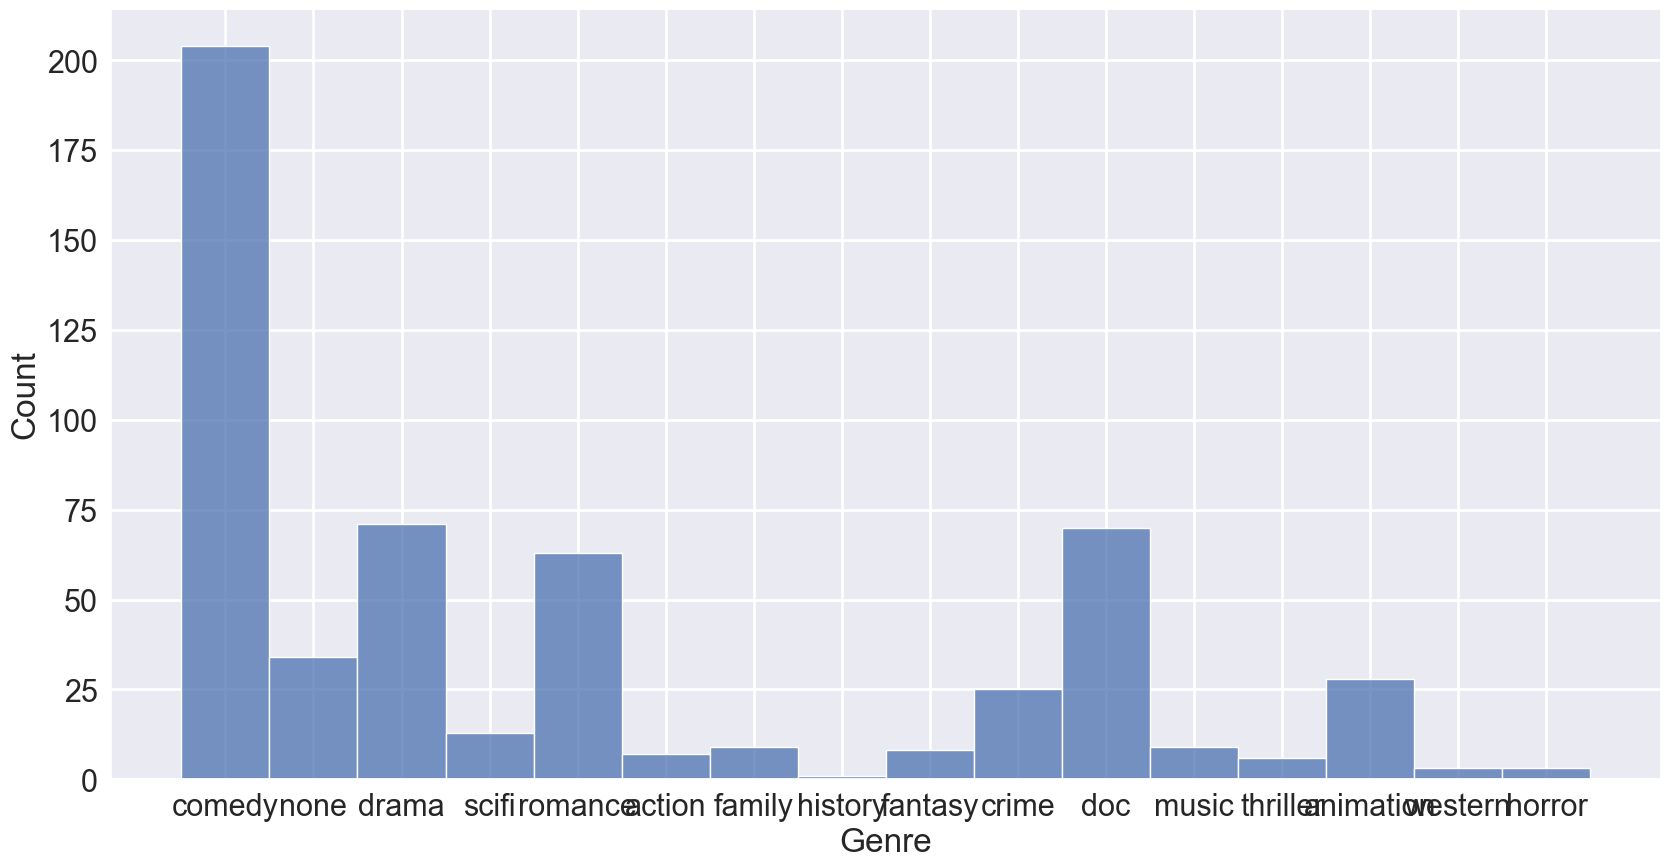

In [77]:
# Create histogram showing Genre by count
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.histplot(data_combined.Genre)

In [78]:
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy


<h3><strong>Question:</strong></h3>
What are the top five most watched titles in the combined dataset?

Which is the top most watched title?

In [79]:
top_titles = data_combined.Title.value_counts().head()

top_titles

Jeff Dunham: Relative Disaster             30
Katt Williams: Great America               23
Pinkfong & Baby Shark's Space Adventure    13
Grey's Anatomy                             11
Someone Great                              10
Name: Title, dtype: int64

In [80]:
# convert series back to dataframe for visualisation 
titles_counts = pd.DataFrame({'Title': top_titles.index, 'counts': top_titles.values})

titles_counts

,Title,counts
0,Jeff Dunham: Relative Disaster,30
1,Katt Williams: Great America,23
2,Pinkfong & Baby Shark's Space Adventure,13
3,Grey's Anatomy,11
4,Someone Great,10


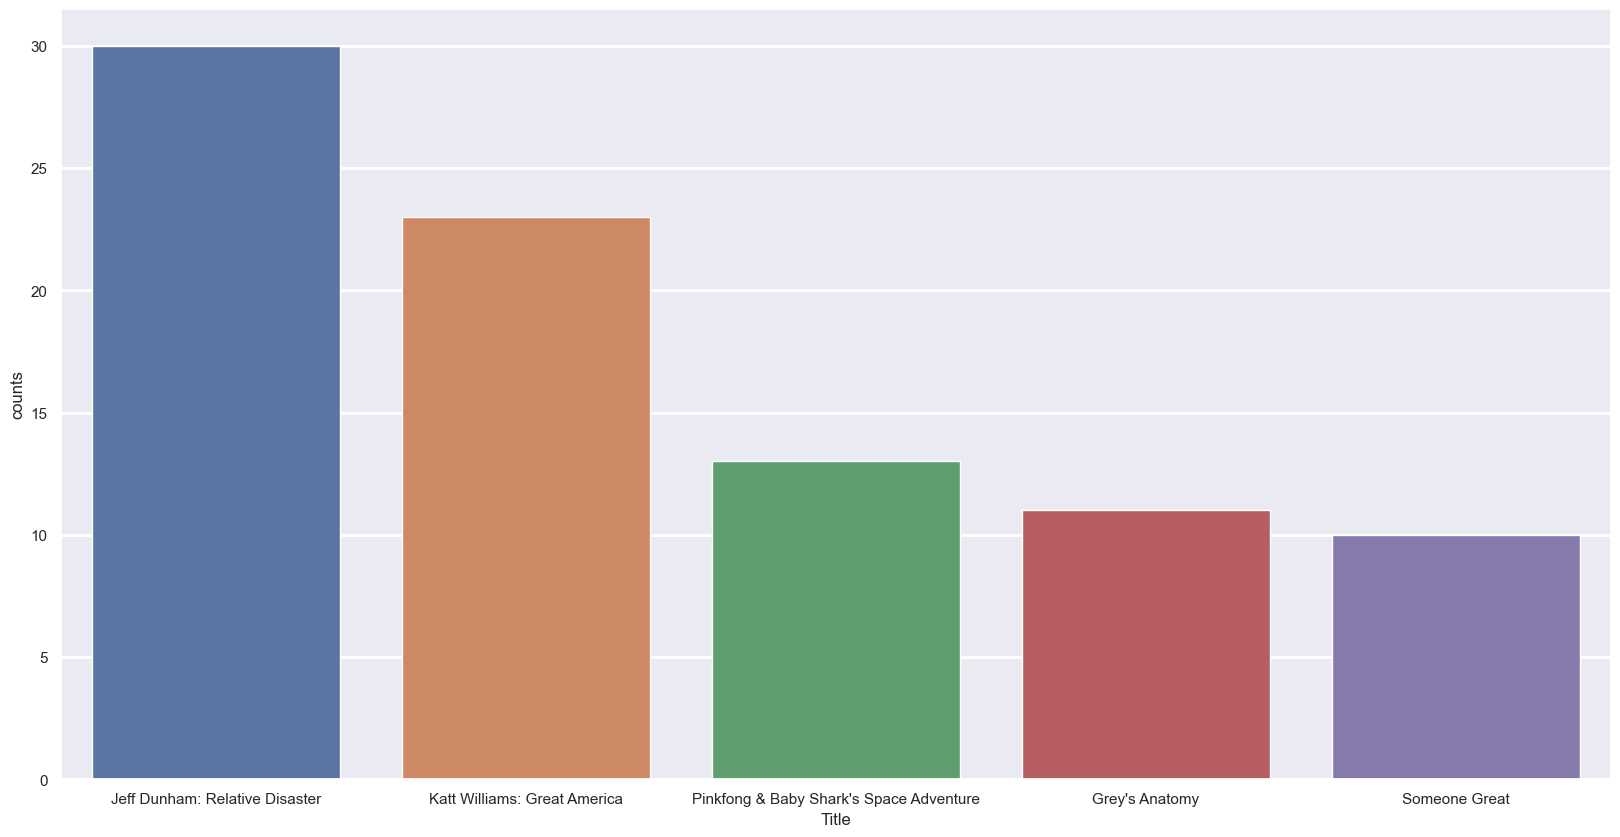

In [81]:
# Create a Seaborn Barplot showing top 5 titles watched
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

sns.barplot(x = "Title", y="counts", data = titles_counts)

plt.show()

<h3><strong>Answers:</strong></h3>
Top 5 streamed titles
<ul>
    <li>Jeff Dunham: Relative Disaster</li>
    <li>Katt Williams: Great America</li>
    <li>Pinkfong & Baby Shark's Space Adventure</li>
    <li>Grey's Anatomy</li>
    <li>Someone Great</li>
</ul>

The top streamed title is *Jeff Dunham: Relative Disaster*

In [82]:
# Group the "Release Year" by decade
def get_decade(val):
    return int(str(val)[0:-1] + "0")

data_combined["Decade"] = data_combined["Release Year"].map(get_decade)
data_combined["Decade"].value_counts()

2010    310
2020    193
2000     32
1990     18
1950      1
Name: Decade, dtype: int64

In [83]:

data_combined["Date Watched"] = pd.to_datetime(data_combined["Date Watched"], utc=True)

In [84]:
data_combined = data_combined.set_index("Date Watched")

In [85]:
data_combined.index = data_combined.index.tz_convert('America/New_York')

In [86]:
data_combined = data_combined.reset_index()

In [87]:
data_combined["Day Watched"] = data_combined["Date Watched"].dt.weekday
data_combined["Hour Watched"] = data_combined["Date Watched"].dt.hour

In [88]:
data_combined.head()

,Date Watched,Title,Streaming Service,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre,Decade,Day Watched,Hour Watched
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy,2010,2.0,15.0
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy,2010,5.0,17.0
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5.0,23.0
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5.0,23.0
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,6.0,0.0


In [89]:
# Set the days Monday-Sunday
data_combined['Day Watched'] = pd.Categorical(data_combined['Day Watched'], categories=[0,1,2,3,4,5,6], ordered=True)

In [90]:
# Create watched_per_day and sort by "Day Watched" using sort_index function to show 
watched_per_day = data_combined['Day Watched'].value_counts().sort_index()

watched_per_day

0     66
1     74
2     57
3     59
4     61
5    126
6    104
Name: Day Watched, dtype: int64

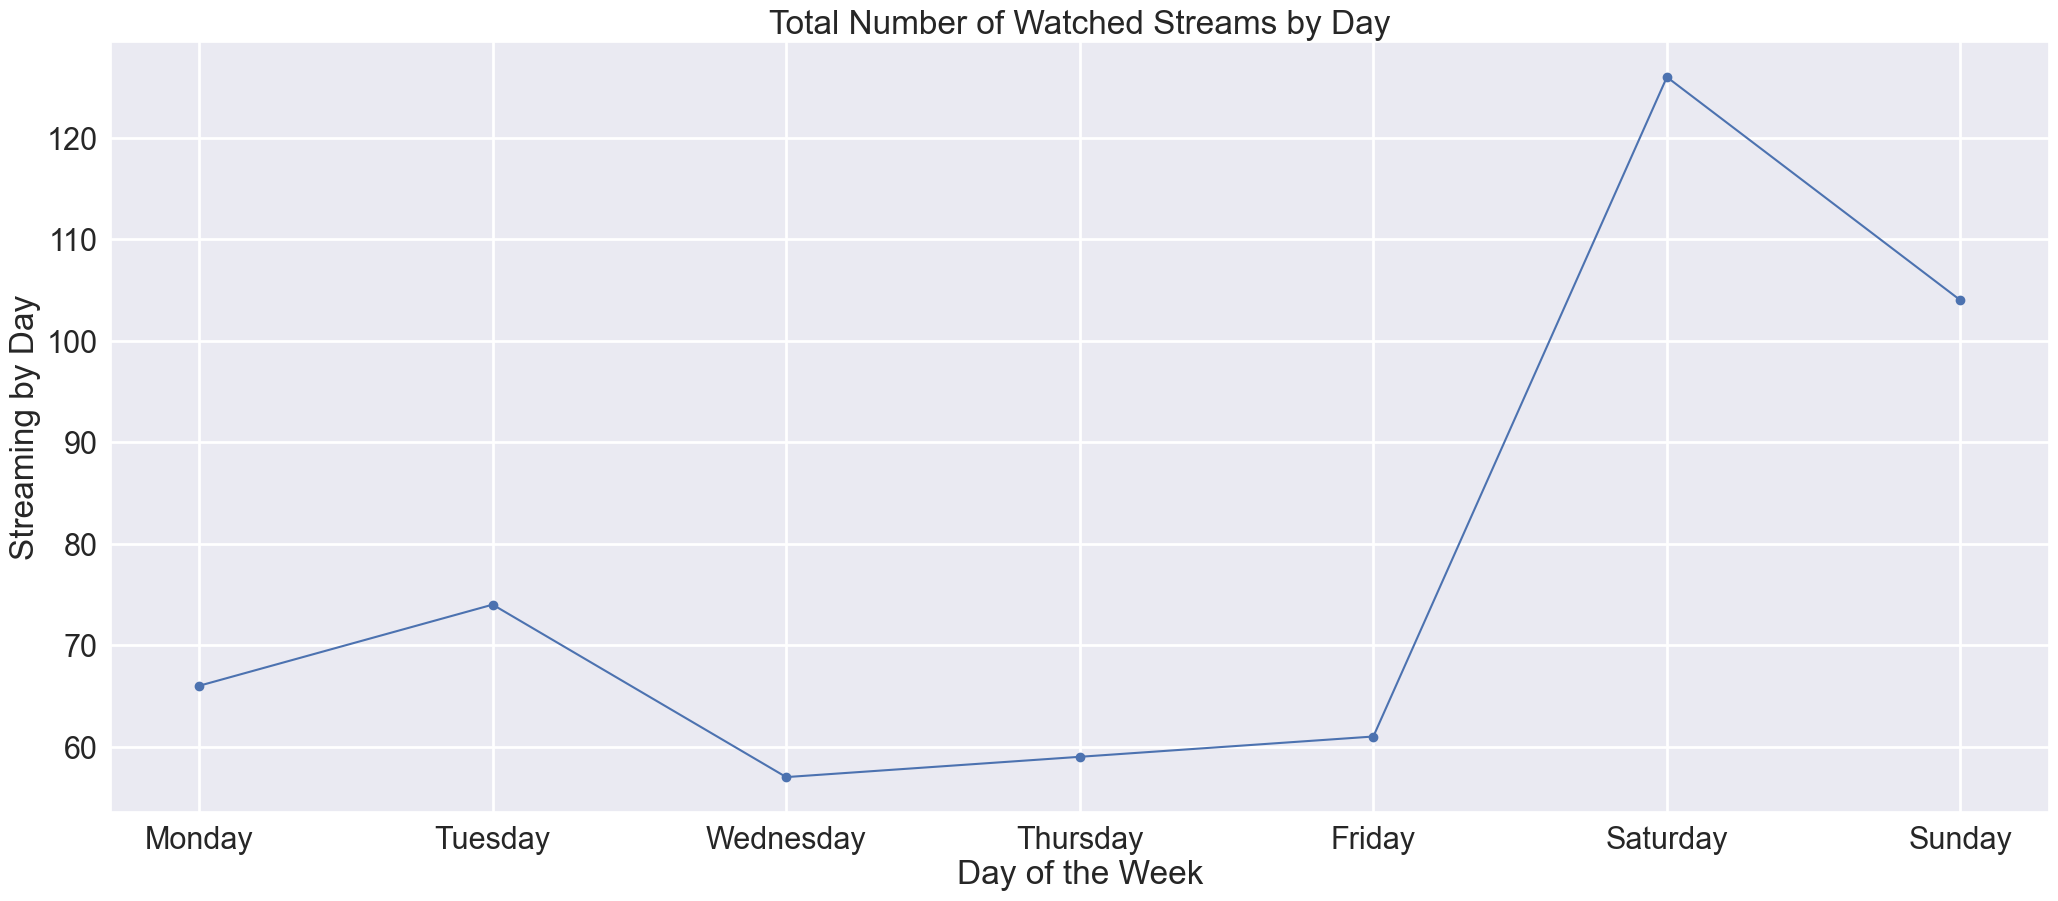

<Figure size 640x480 with 0 Axes>

In [91]:
# Create Plot
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2}) 

plt.plot(watched_per_day, marker="o")

days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.ylabel('Streaming by Day')
plt.xlabel('Day of the Week')
plt.xticks(ticks = range(7), labels=days_of_the_week)
plt.title('Total Number of Watched Streams by Day')

plt.show()
plt.clf()

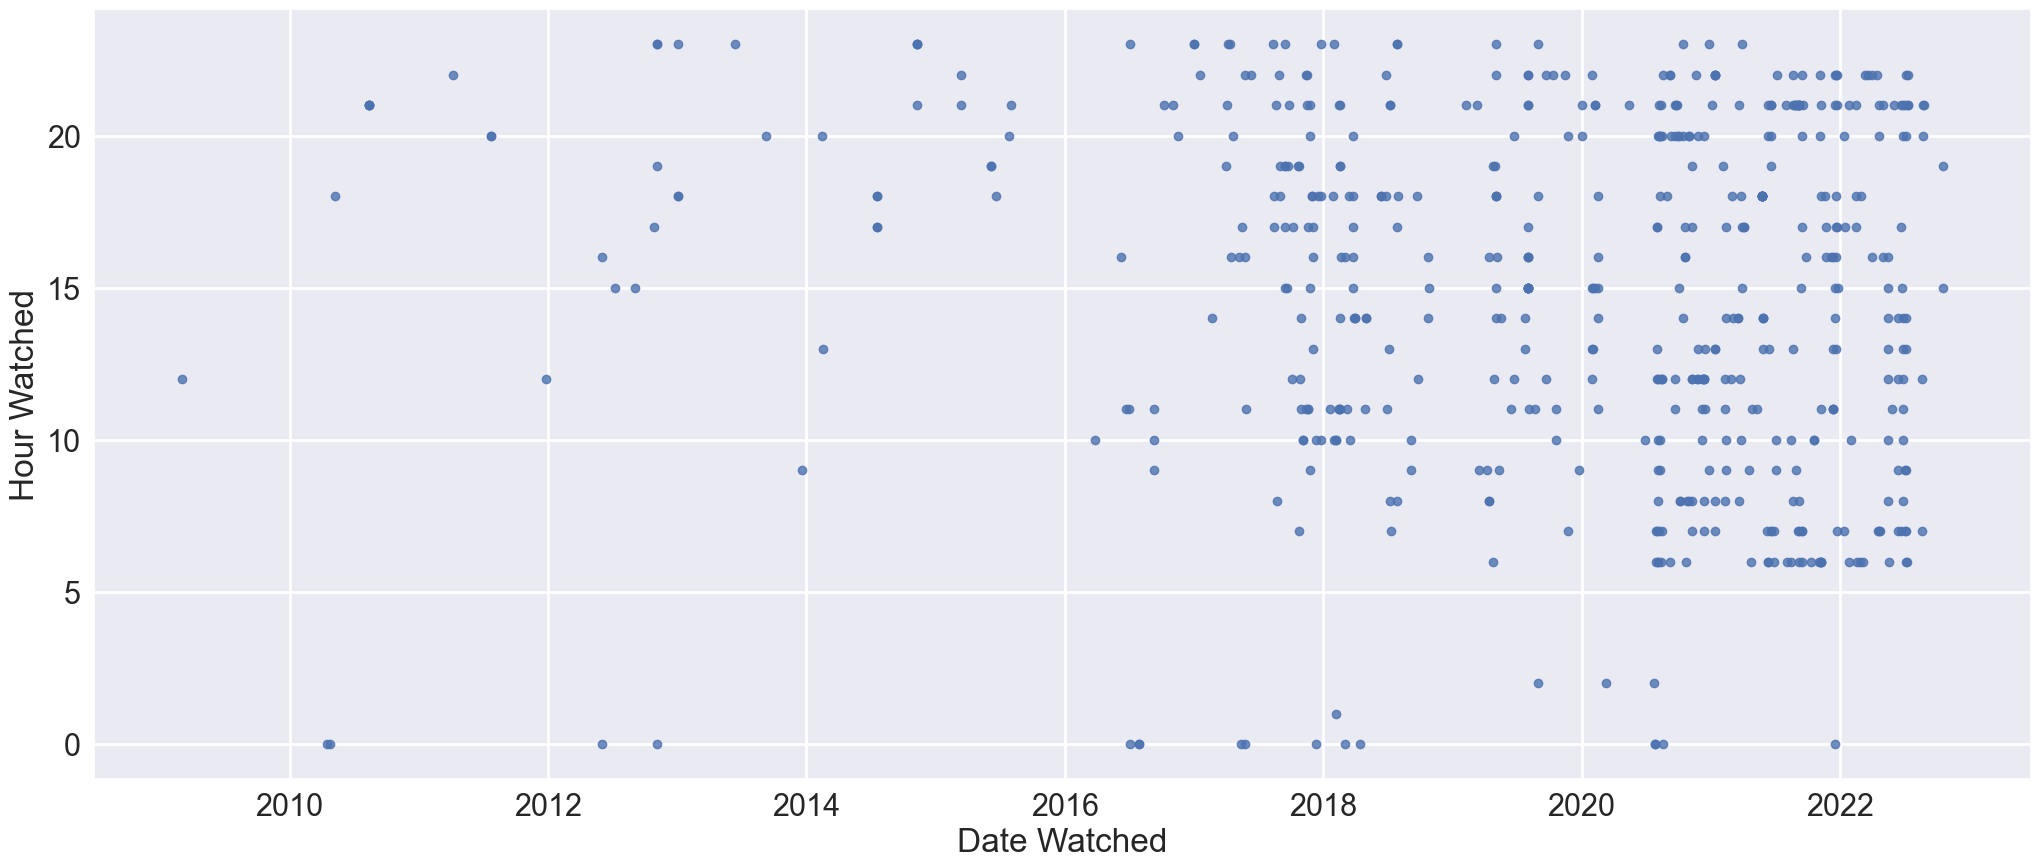

In [92]:
# Create a Regplot to show all the watch instances by "Date Watched"
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2})

# sns.regplot(x = "Day Watched", y = "Hour Watched", data=data_combined)
ax = sns.regplot(x= data_combined["Date Watched"], y= data_combined["Hour Watched"], fit_reg=False)
plt.show()

In [93]:
# Set hours
data_combined['Hour Watched'] = pd.Categorical(data_combined['Hour Watched'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [94]:
# Create watched_per_hour and sort by "Hour Watched" using sort_index function so the hours are in order
watched_per_hour = data_combined['Hour Watched'].value_counts().sort_index()

watched_per_hour

0     16
1      1
2      3
3      0
4      0
5      0
6     28
7     28
8     19
9     18
10    25
11    33
12    31
13    19
14    26
15    27
16    26
17    27
18    44
19    18
20    35
21    63
22    37
23    23
Name: Hour Watched, dtype: int64

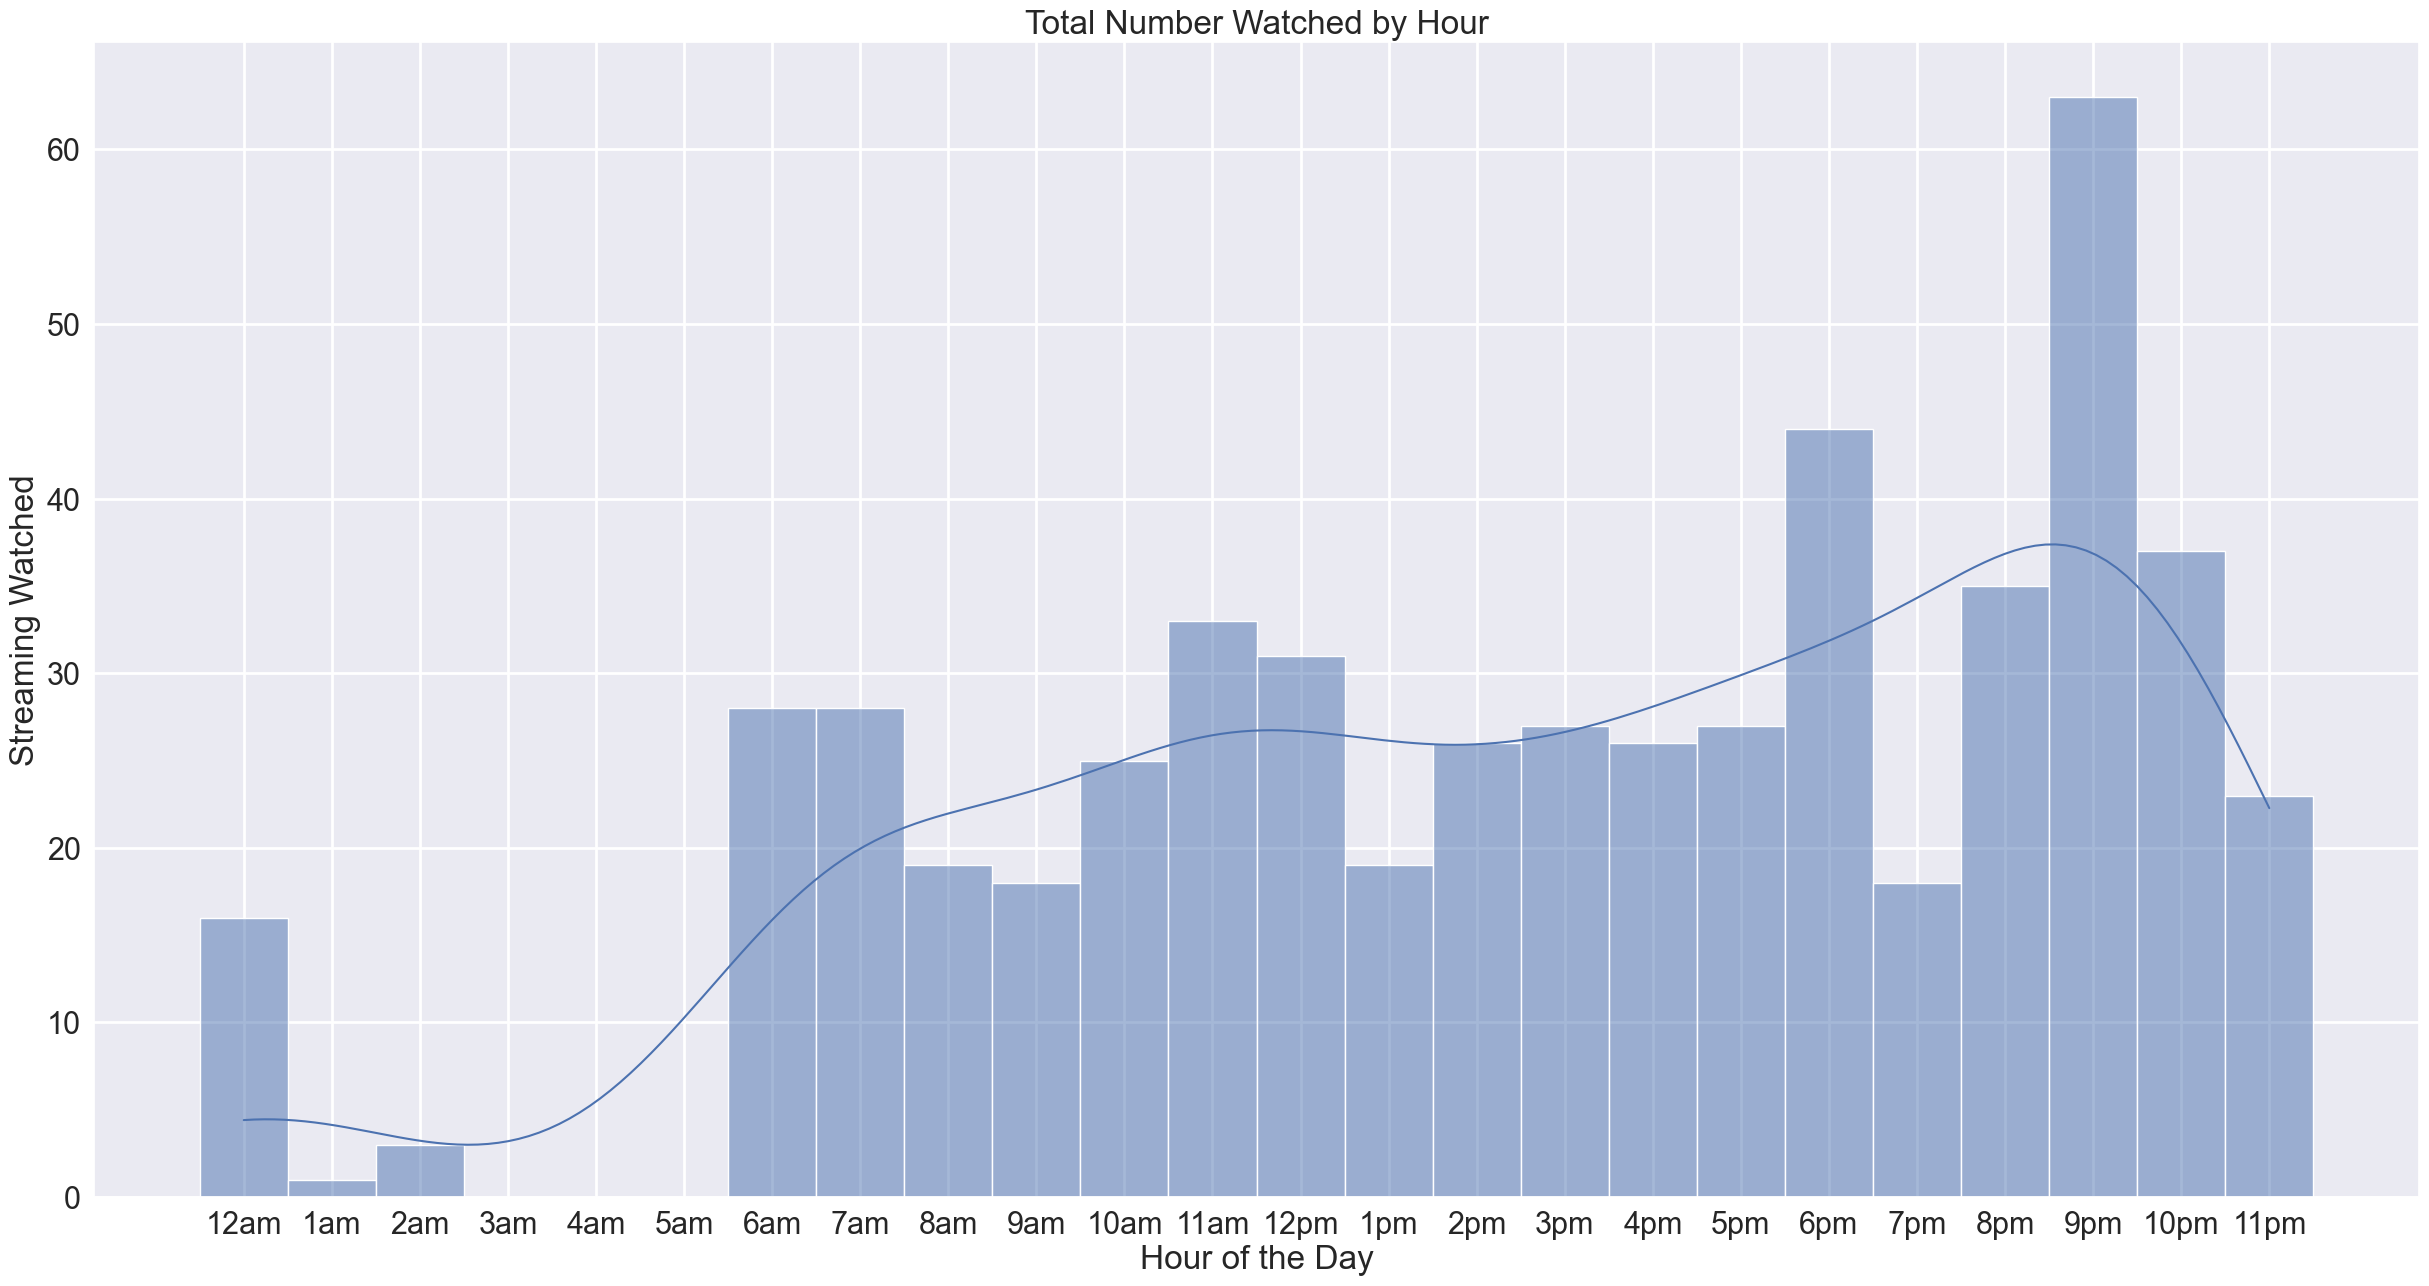

<Figure size 640x480 with 0 Axes>

In [95]:
sns.set_style('darkgrid')
plt.figure(figsize=(30, 15))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2}) 

sns.histplot(data_combined["Hour Watched"], kde=True)

hours_per_day = ["12am", "1am", "2am","3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]
plt.ylabel('Streaming Watched')
plt.xlabel('Hour of the Day')
plt.xticks(ticks = range(24), labels=hours_per_day)
plt.title('Total Number Watched by Hour')

plt.show()
plt.clf()